# Import and warehouse data:
• Import all the given datasets and explore shape and size.
•  Merge all datasets onto one and explore final shape and size.
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [89]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

In [3]:
df1= pd.read_csv("Part1 - Car name.csv") #Reading the Part1 - Car name into df1
df2=pd.read_json ("Part1 - Car-Attributes.json")#Reading the Part2 - Car name into df1

In [4]:
#Exploring the size and shape of the data frame 1
print("The shape of data frame 1 Car name is"+str(df1.shape))
print("The size of data frame 1 Car name is "+str(df1.size))


The shape of data frame 1 Car name is(398, 1)
The size of data frame 1 Car name is 398


In [5]:
#Exploring the size and shape of the data frame 2
print("The shape of data frame 2 Car Attributes is"+str(df2.shape))
print("The size of data frame 2 Car Attributes is "+str(df2.size))

The shape of data frame 2 Car Attributes is(398, 8)
The size of data frame 2 Car Attributes is 3184


In [8]:
#Examining the first columns of the data frame2
df2.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


1.cyl,yr,origin fields are  multi valued discrete as per the information.Hence, checking what kind of values are avaiable in the three values.

In [6]:
print("Unique values in cyl field:")
df2["cyl"].unique()

Unique values in cyl field:


array([8, 4, 6, 3, 5], dtype=int64)

In [7]:
print("Unique values in yr field:")
df2["yr"].unique()

Unique values in yr field:


array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [8]:
print("Unique values in origin field:")
df2["origin"].unique()

Unique values in origin field:


array([1, 3, 2], dtype=int64)

In [9]:
#Exploring the data types in data frame 2
df2.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [10]:
#Exploring the data types in data frame1
df1.dtypes

car_name    object
dtype: object

In [11]:
#Merging the two data sets into one data frame. From the initial analysis it can be infered that there are 398 rows in both the data sets.
#Hence, concatenating both of them vertically.
final_df=pd.concat([df1, df2], axis=1)

In [12]:
#Exploring the size and shape of the  final data frame 
print("The shape of final data frame is"+str(final_df.shape))
print("The size of final data frame is "+str(final_df.size))


The shape of final data frame is(398, 9)
The size of final data frame is 3582


In [17]:
#Exporting the final data frame into local machine in csv format.
final_df.to_csv('F:\\git\\UnsupervisedLearning\\FinalData_CarSet.csv', index = False)

In [18]:
#Exporting the final data frame into local machine in xlsx format.
final_df.to_excel('F:\\git\\UnsupervisedLearning\\FinalData_CarSet.xlsx', index = False)

In [19]:
#Exporting the final data frame into local machine in json format.
final_df.to_json('F:\\git\\UnsupervisedLearning\\FinalData_CarSet.json')

# 2. Data cleansing: 

• Missing/incorrect value treatment
• Drop attribute/s if required using relevant functional knowledge
• Perform another kind of corrections/treatment on the data.

In [20]:
#Checking for missing values in the final data frame
final_df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [21]:
final_df[final_df['hp']=='?']


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [22]:
#Dropping the rows with missing values
final_df.drop(final_df[final_df['hp']== '?'].index, inplace = True)


In [23]:
final_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


The objective of the project is to cluster the data to predict mpg. I feel that the field car_name,year,origin has nothing to do with the mpg value as mpg does not depend on it. Hence, dropping the column.


In [24]:
df=final_df.copy(deep=True)

In [25]:
df.drop('yr', axis='columns', inplace=True)
df.drop('origin', axis='columns', inplace=True)
df.drop('car_name', axis='columns', inplace=True)

In [26]:
df.head()

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


# 3.Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

1.Data Analysis for field mpg

In [28]:
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

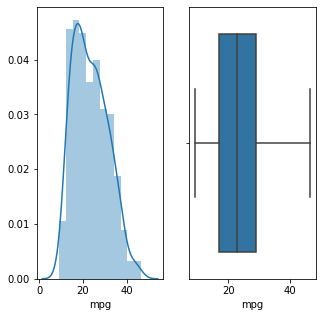

In [30]:
plt.figure(figsize= (5,5))
plt.subplot(1, 2, 1)
sns.distplot(df.mpg,kde=True)
plt.xlabel('mpg')

plt.subplot(1, 2, 2)
sns.boxplot(x=df["mpg"])


From the above analysis , the following points can be infered.
1.The mean of the data is 23.44 with a standard deviation of 7.80
2.The mean is slightly greater  that the 50% which indicates that the data is postively skewed.
3. No presence of outliers are detected

2.Data Analysis for field cyl.

From the initial information given in the project it is evident that the cylinder field is multi valued discrete.That means it happens to be divided into categories. Plotting the distribution below

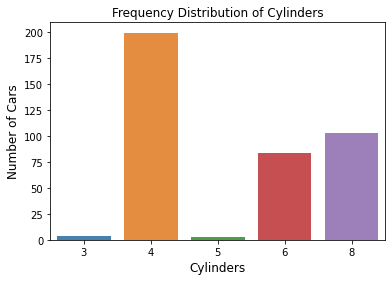

In [31]:
cyl_count = df['cyl'].value_counts()
sns.barplot(cyl_count.index, cyl_count.values, alpha=0.9)
plt.title('Frequency Distribution of Cylinders')
plt.ylabel('Number of Cars', fontsize=12)
plt.xlabel('Cylinders', fontsize=12)
plt.show()

From the above plot it is evident that the highest number of cars have 4 cylinders followed by 8 and then 6.
The point that can be concluded from the above plot is that maximum amount of cars are manufactured with even number of cylinders while there are very few that are manufactured with odd number of cylinders.
Here,the question of whether the no of cylinders have an effect on mpg plays a role.
There can be also one more question why there are so many less number of cars can be investigated further in bivariate analysis

3.Data Analysis for field disp.

From the initial information given the field displacement happens to be a continous variable. Hence, lets look at the statistics.

In [32]:
df['disp'].describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: disp, dtype: float64

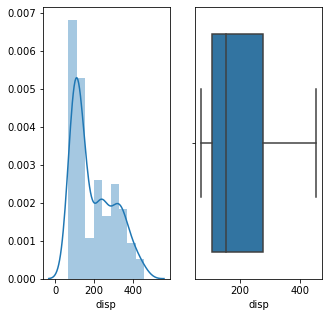

In [33]:
plt.figure(figsize= (5,5))
plt.subplot(1, 2, 1)
sns.distplot(df.disp,kde=True)
plt.xlabel('disp')

plt.subplot(1, 2, 2)
sns.boxplot(x=df["disp"])

From the above analysis , the following points can be infered.
1.The mean of the data is 194.41 with a standard deviation of 104.64
2.The mean is  greater  that the 50% which indicates that the data is postively skewed.
3. No presence of outliers are detected
4. Also one thing is evident that the data for the displacement is probably spread over 3 gaussians.

4.Data Analysis for field hp

In [40]:
df['hp']=pd.to_numeric(df['hp'], errors='coerce')

In [41]:
df['hp'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: hp, dtype: float64

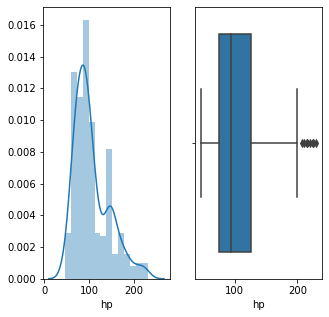

In [36]:
plt.figure(figsize= (5,5))
plt.subplot(1, 2, 1)
sns.distplot(df.hp,kde=True)
plt.xlabel('hp')

plt.subplot(1, 2, 2)
sns.boxplot(x=df["hp"])

From the above analysis , the following points can be infered.
1.The mean of the data is 104.46 with a standard deviation of 38.49
2.The mean is  greater  that the 50% which indicates that the data is postively skewed.
3. Outliers are observed for this particular column
4. From the plot data is distributed in different gaussians

4.Data Analysis for field wt

In [42]:
df['wt'].describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: wt, dtype: float64

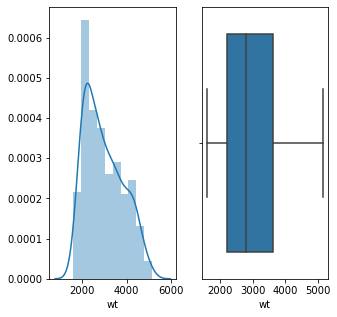

In [43]:
plt.figure(figsize= (5,5))
plt.subplot(1, 2, 1)
sns.distplot(df.wt,kde=True)
plt.xlabel('wt')

plt.subplot(1, 2, 2)
sns.boxplot(x=df["wt"])

From the above analysis , the following points can be infered.
1.The mean of the data is 2977.58 with a standard deviation of 849.40
2.The mean is  greater  that the 50% which indicates that the data is postively skewed.
3. No presence of outliers are detected


5. Data analysis for field acc

In [45]:
df['acc'].describe()

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acc, dtype: float64

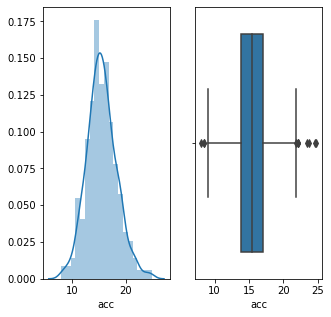

In [46]:
plt.figure(figsize= (5,5))
plt.subplot(1, 2, 1)
sns.distplot(df.acc,kde=True)
plt.xlabel('acc')

plt.subplot(1, 2, 2)
sns.boxplot(x=df["acc"])

From the above analysis , the following points can be infered.
1.The mean of the data is 15.54 with a standard deviation of 2.75
2.The mean almost same as the 50% which indicates that the data is normally distributed.
3. presence of outliers is detected


From the above histogram it can be infered that from the above data the most manufactured cars are in 73.

In [ ]:
II-bivariate Analysis

In [47]:
df.corr()

,mpg,cyl,disp,hp,wt,acc
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
disp,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
wt,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acc,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


1.Displacement and mpg are negatively correlated.
2.hp and mpg are negatively correlated.
3.disp and hp is highly correlated
Plotting the heat map below to  indicate the same

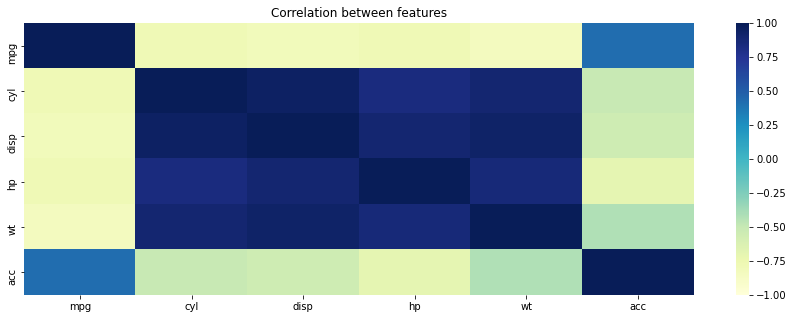

In [49]:
corr=df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation between features')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

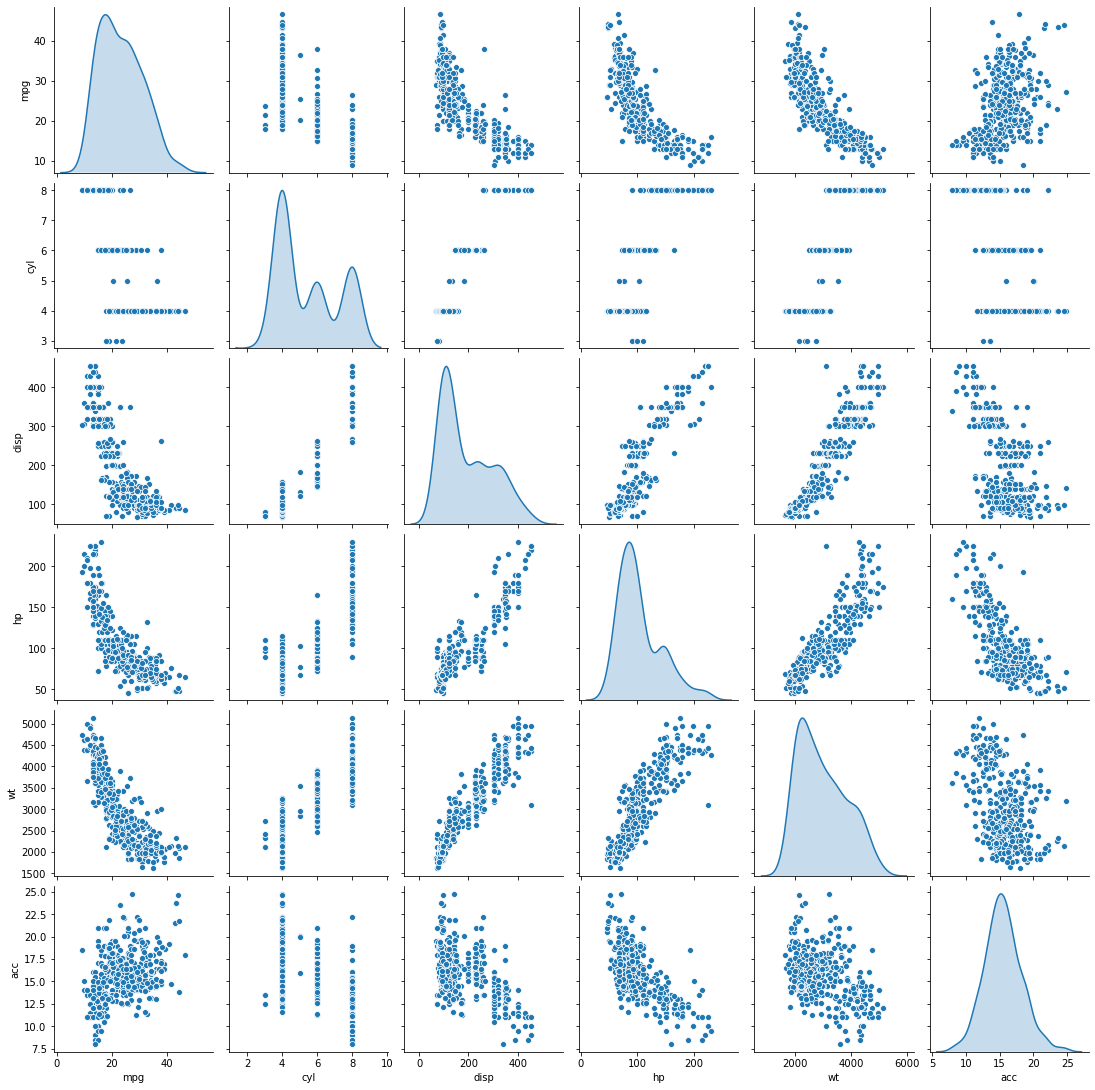

In [52]:
fig = plt.figure()
plt.figure(figsize=(20,20))
sns.pairplot(df,diag_kind='kde')

1. From the above figures we can observe that as number of cylinders are increasing, there is a decrease in the mpg value
2.Displacement and mpg are negatively correlated
3.hp and mpg are negatively correlated
4.wt and mpg are negatively correlated
5. The plot between acc and mpg shows that the data is spread out and accc has no effect on the mpg
6. Also the data seems to be spreadd in different gaussians

IV- Machine learning: 
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 
• Share your insights about the difference in using these two methods. 

K-means clustering is senstive towards, the presence of outliers. From tha above univariate analysis it can be infered that
there is presence of outliers for acc and hp fields.

In [54]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_without_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outliers.shape


mpg       12.00
cyl        4.00
disp     170.75
hp        51.00
wt      1389.50
acc        3.25
dtype: float64


(372, 6)

In [55]:
# independant variables
X = df_without_outliers.drop(['mpg'], axis=1)
# the dependent variable
y = df_without_outliers[['mpg']]

1.K-Means:

In [60]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.291613e+07
1,3,3.384418e+07
2,4,1.880621e+07
3,5,1.349627e+07


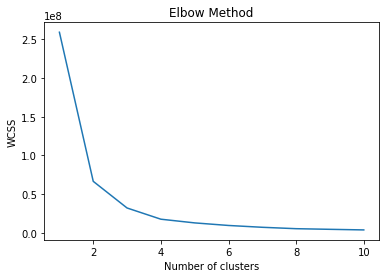

In [56]:
#Finding optimal no. of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The optimal number from the elbow plot seems to be k=3

In [61]:
df.head()

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [62]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

df_attr = df.loc[:, 'mpg':'acc']
df_attr_z = df_attr.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_attr_z)
prediction=cluster.predict(df_attr_z)
df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
df_attr_z_copy = df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [63]:
centroids = cluster.cluster_centers_
centroids

array([[-1.14393843,  1.47184414,  1.46979213,  1.49145953,  1.37493755,
        -1.05253303],
       [-0.46592926,  0.33521362,  0.22847796, -0.06927147,  0.29302334,
         0.30812718],
       [ 0.76382895, -0.86110766, -0.81098162, -0.6843036 , -0.79514908,
         0.36356374]])

In [64]:
centroid_df = pd.DataFrame(centroids, columns = list(df_attr) )
centroid_df

,mpg,cyl,disp,hp,wt,acc
0,-1.143938,1.471844,1.469792,1.491460,1.374938,-1.052533
1,-0.465929,0.335214,0.228478,-0.069271,0.293023,0.308127
2,0.763829,-0.861108,-0.810982,-0.684304,-0.795149,0.363564


In [65]:
df_attr_z_copy.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,0
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,0
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,0
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,0
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,0


2.Hierarchial:

In [67]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10,10))
from scipy.stats import zscore

df_h_attr = df.loc[:, 'mpg':'acc']
df_h_attr_z = df_h_attr.apply(zscore)

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(df_h_attr_z)


AgglomerativeClustering(linkage='average', n_clusters=3)

<Figure size 720x720 with 0 Axes>

In [68]:
df_h_attr_z['labels'] = model.labels_
df_h_attr_z.head(10)

,mpg,cyl,disp,hp,wt,acc,labels
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,1
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,1
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,1
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,1
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,1
5,-1.083498,1.483947,2.244637,2.433030,1.607198,-2.011120,1
6,-1.211785,1.483947,2.483848,3.005320,1.622523,-2.374052,1
7,-1.211785,1.483947,2.349890,2.875254,1.573013,-2.555517,1
8,-1.211785,1.483947,2.493416,3.135386,1.706218,-2.011120,1
9,-1.083498,1.483947,1.871469,2.224924,1.028406,-2.555517,1


In [69]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [72]:
Z = linkage(df_h_attr_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_h_attr_z))

c

0.8343061423915611

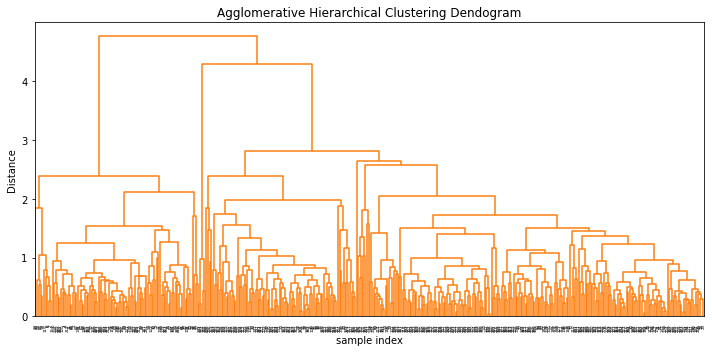

In [74]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=4. )
plt.tight_layout()

Considering the distance, it seems that n=4  will be optimal.
As we have seen in the above section, the results of both the clustering are almost similar to the same dataset. It may be possible that when we have a very large dataset, the shape of clusters may differ a little. However, along with many similarities, these two techniques have some differences also.
Computationally hierachial is expensive. So when the data set is large it is better to choose k means clustering

5. Answer below questions based on outcomes of using ML based methods. 
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
As the no of data rows available are less, it is better to use hierachial clustering because of the computation. and optimal no of clusters present are 4.

 Use linear regression model on different clusters separately and print the coefficients of the models individually

In [ ]:
#Choosing the K means clustering data set

In [75]:
df_attr_z.head()

,mpg,cyl,disp,hp,wt,acc,GROUP
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,0
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,0
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,0
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,0
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,0


C:\Softwares\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Softwares\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Softwares\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


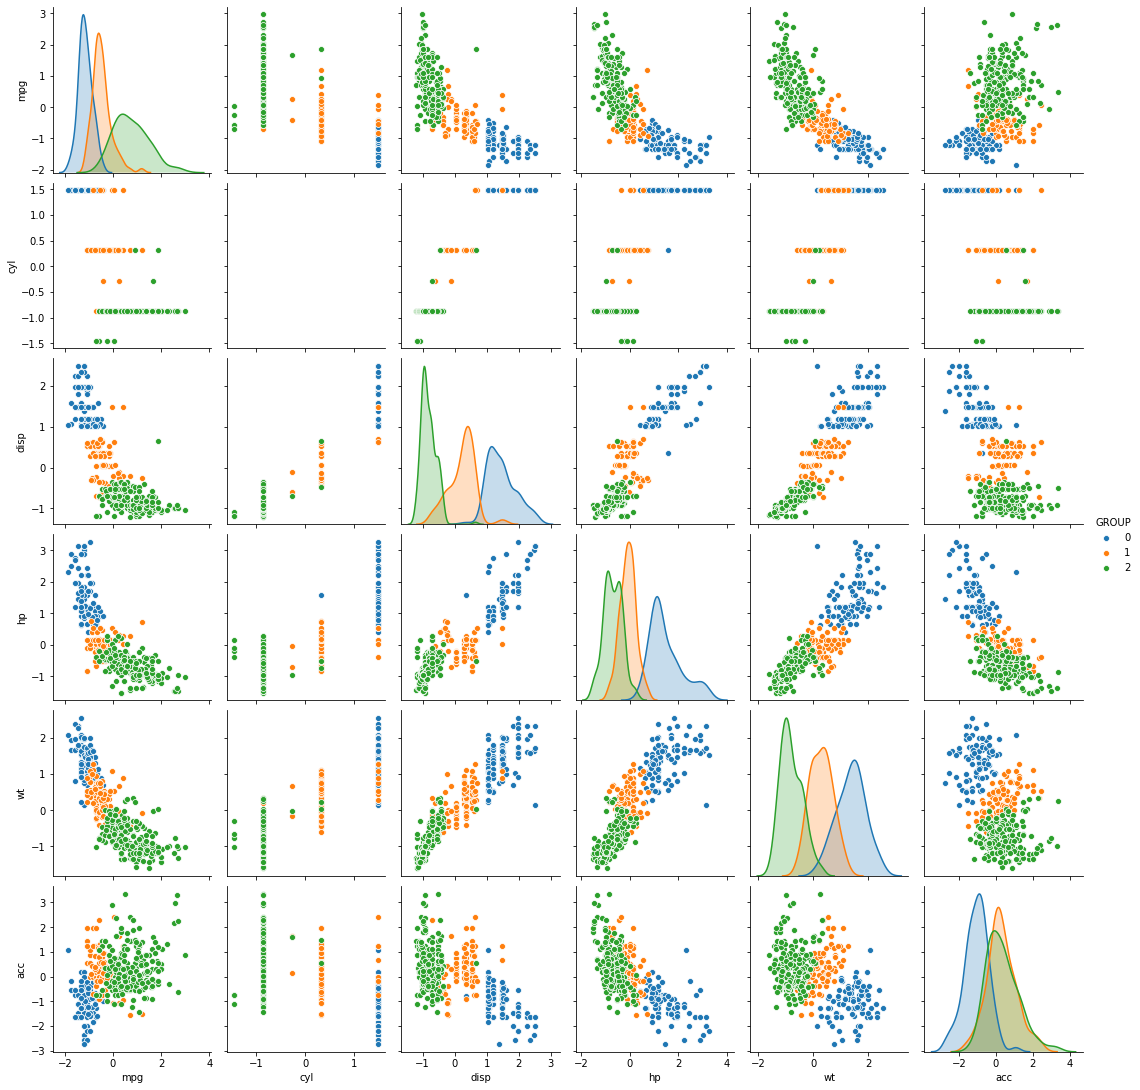

In [79]:
sns.pairplot(df_attr_z,hue="GROUP")

In [82]:
#wt and hp are positively correlated, bp and acc also have a correlation acroos the clusters from the above plot. Hence, removing those columns

In [124]:
df_linear_regression=df_linear_regression.drop("wt",axis=1)
df_linear_regression=df_linear_regression.drop("acc",axis=1)



In [141]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df_linear_regression.drop('mpg', axis=1)
X = df_linear_regression.drop('GROUP', axis=1)
# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df_linear_regression[['mpg']]

In [126]:
X.head()

,mpg,cyl,disp,hp
0,-0.698638,1.483947,1.077290,0.664133
1,-1.083498,1.483947,1.488732,1.574594
2,-0.698638,1.483947,1.182542,1.184397
3,-0.955212,1.483947,1.048584,1.184397
4,-0.826925,1.483947,1.029447,0.924265


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [128]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for mpg is 1.0000000000000007
The coefficient for cyl is -4.789147459308593e-17
The coefficient for disp is -7.900996412549896e-17
The coefficient for hp is -7.255349097057132e-17


In [129]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.938893903907228e-18


In [130]:
regression_model.score(X_train, y_train)#This clearly indicates that our model is overfit .Hence, we need to apply seperate models for sepearet clusters

1.0

In [131]:
regression_model.score(X_test, y_test)

1.0

In [142]:
df_linear_regression_Group_0=df_linear_regression[df_attr_z["GROUP"]==0]
df_linear_regression_Group_1=df_linear_regression[df_attr_z["GROUP"]==1]
df_linear_regression_Group_2=df_linear_regression[df_attr_z["GROUP"]==2]

In [149]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X_Group_0 = df_linear_regression_Group_0.drop('mpg', axis=1)
X_Group_0 = df_linear_regression_Group_0.drop('GROUP', axis=1)
# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y_Group_0 = df_linear_regression_Group_0[['mpg']]

X_Group_0_train, X_Group_0_test, y_Group_0_train, y_Group_0_test = train_test_split(X_Group_0, y_Group_0, test_size=0.30 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_Group_0_train, y_Group_0_train)
for idx, col_name in enumerate(X_Group_0_train.columns):
    print("The coefficient for  {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for  mpg is 0.9999999999999999
The coefficient for  cyl is 1.0149198181388909e-17
The coefficient for  disp is 1.9624762354590491e-16
The coefficient for  hp is 1.8650122821106893e-18


In [148]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X_Group_1 = df_linear_regression_Group_1.drop('mpg', axis=1)
X_Group_1 = df_linear_regression_Group_1.drop('GROUP', axis=1)
# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y_Group_1 = df_linear_regression_Group_1[['mpg']]

X_Group_1_train, X_Group_1_test, y_Group_1_train, y_Group_1_test = train_test_split(X_Group_1, y_Group_1, test_size=0.30 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_Group_1_train, y_Group_1_train)
for idx, col_name in enumerate(X_Group_0_train.columns):
    print("The coefficient for  {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for  mpg is 0.9999999999999999
The coefficient for  cyl is 1.0653657263798214e-16
The coefficient for  disp is -6.999281838374698e-17
The coefficient for  hp is 7.97911163252273e-17


In [147]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X_Group_2 = df_linear_regression_Group_2.drop('mpg', axis=1)
X_Group_2 = df_linear_regression_Group_2.drop('GROUP', axis=1)
# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y_Group_2 = df_linear_regression_Group_2[['mpg']]

X_Group_2_train, X_Group_2_test, y_Group_2_train, y_Group_2_test = train_test_split(X_Group_2, y_Group_2, test_size=0.30 , random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_Group_2_train, y_Group_2_train)

for idx, col_name in enumerate(X_Group_0_train.columns):
    print("The coefficient for  {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for  mpg is 1.0000000000000009
The coefficient for  cyl is 5.255920926008178e-17
The coefficient for  disp is -1.0514030045244034e-16
The coefficient for  hp is -4.617814368617334e-16


How using different models for different clusters will be helpful in this case and how it will be different than using one single model without 
clustering? Mention how it impacts performance and prediction

Using different models on different clusters is beneficial because the data is spread over multiple gaussians which will help us predict the data accurately. Otherwise there is a probabaility that the data from one gaussian might influence the other.

 Conclusion:
1.More information regarding each individual terms.. for example the term displacement in context to this scenario would be more helpful.
2.Basically there are two individual data sets given with no common columns.I have proceeded with the assumption that these rows are arranged in a similar manner. But there is no guarantee it has to be true.So this factor can be improvised in the data.
3.The field origin is given as 1,2,3 categorically but does this sequence means something numerically like when we say the field origin is 1 does it mean it is the recent or the the origin 3 is recent.This has to be clarified.